In [1]:
from __future__ import print_function, division
import os
import sys

import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv, find_dotenv
%matplotlib inline

print('sys_version', sys.version.replace('\n', ''))
print('virtual_env', os.environ.get('VIRTUAL_ENV', 'None'))
print('pwd', os.getcwd())
print('np ', np.__version__)
print('pd ', pd.__version__)

logging.getLogger().setLevel(logging.INFO)
load_dotenv(find_dotenv())

sys_version 3.6.1 (default, Mar 27 2017, 00:27:06) [GCC 6.3.1 20170306]
virtual_env None
pwd /home/lpp/Desktop/minion-basecaller/notebook
np  1.12.1
pd  0.19.2


True

In [2]:
from mincall.bioinf_utils import error_rates_for_sam, error_positions_report, CIGAR_OPERATIONS

In [3]:
sam_paths = ['/home/lpp/mnt/ssh/karla/hgst8TB/mratkovic/nanopore_data/nanopore_data_extracted/mincall_m270_lambda.sam', 
             '/home/lpp/mnt/ssh/karla/hgst8TB/mratkovic/nanopore_data/nanopore_data_extracted/nanonet_lambda_r9.sam']
ref_path = '/home/lpp/mnt/ssh/karla/hgst8TB/mratkovic/nanopore_data/references/NC_001416.fa'

## Filtering SAM reads

In [4]:
from mincall.align_utils import filter_aligments_in_sam, read_len_filter

filtered_paths = []
for sam in sam_paths:
    filtered_path = os.path.splitext(sam)[0] + "_filtered.sam"
    filtered_paths.append(filtered_path)
    filters = [read_len_filter(min_len=500)]

    n_kept, n_discarded = filter_aligments_in_sam(sam, filtered_path, filters)
    print(sam + " Kept %d, discarded %d" % (n_kept, n_discarded))

/home/lpp/mnt/ssh/karla/hgst8TB/mratkovic/nanopore_data/nanopore_data_extracted/mincall_m270_lambda.sam Kept 84, discarded 2
/home/lpp/mnt/ssh/karla/hgst8TB/mratkovic/nanopore_data/nanopore_data_extracted/nanonet_lambda_r9.sam Kept 82, discarded 3


## Error rates

In [5]:
df = {}
for sam in filtered_paths:
    df[sam.split(os.sep)[-1]] = error_rates_for_sam(sam)

ERROR:root:Andrej_HC_20160706_FNFAD12873_MN17271_sequencing_run_lambda_R9_6_7_16_21932_ch299_read862_strand1 is unmapped


In [6]:
df.keys()

dict_keys(['mincall_m270_lambda_filtered.sam', 'nanonet_lambda_r9_filtered.sam'])

In [7]:
df['nanonet_lambda_r9_filtered.sam'].describe()

,Error rate,Match rate,Mismatch rate,Insertion rate,Deletion rate,Read length
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,0.250853,0.866972,0.092565,0.040463,0.117825,4980.851852
std,0.068106,0.044959,0.030928,0.016116,0.028332,2711.050701
min,0.137373,0.754147,0.047272,0.018040,0.062127,633.000000
25%,0.200460,0.825841,0.068567,0.027857,0.100574,2313.000000
50%,0.235013,0.882456,0.081996,0.035513,0.118373,4939.000000
75%,0.308723,0.903673,0.119356,0.053100,0.134966,6985.000000
max,0.452135,0.932824,0.180530,0.084609,0.222829,12778.000000


In [8]:
df['mincall_m270_lambda_filtered.sam'].describe()

,Error rate,Match rate,Mismatch rate,Insertion rate,Deletion rate,Read length
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.283074,0.878692,0.086448,0.034860,0.161767,5193.559524
std,0.121630,0.056240,0.035037,0.027073,0.082657,2564.287305
min,0.137495,0.582994,0.042060,0.015479,0.060324,564.000000
25%,0.174059,0.848191,0.056903,0.022621,0.093241,3193.750000
50%,0.220612,0.900027,0.072123,0.029007,0.130534,5262.500000
75%,0.396086,0.918075,0.115770,0.037323,0.232818,7034.000000
max,0.533555,0.939368,0.209681,0.207325,0.352312,11417.000000


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


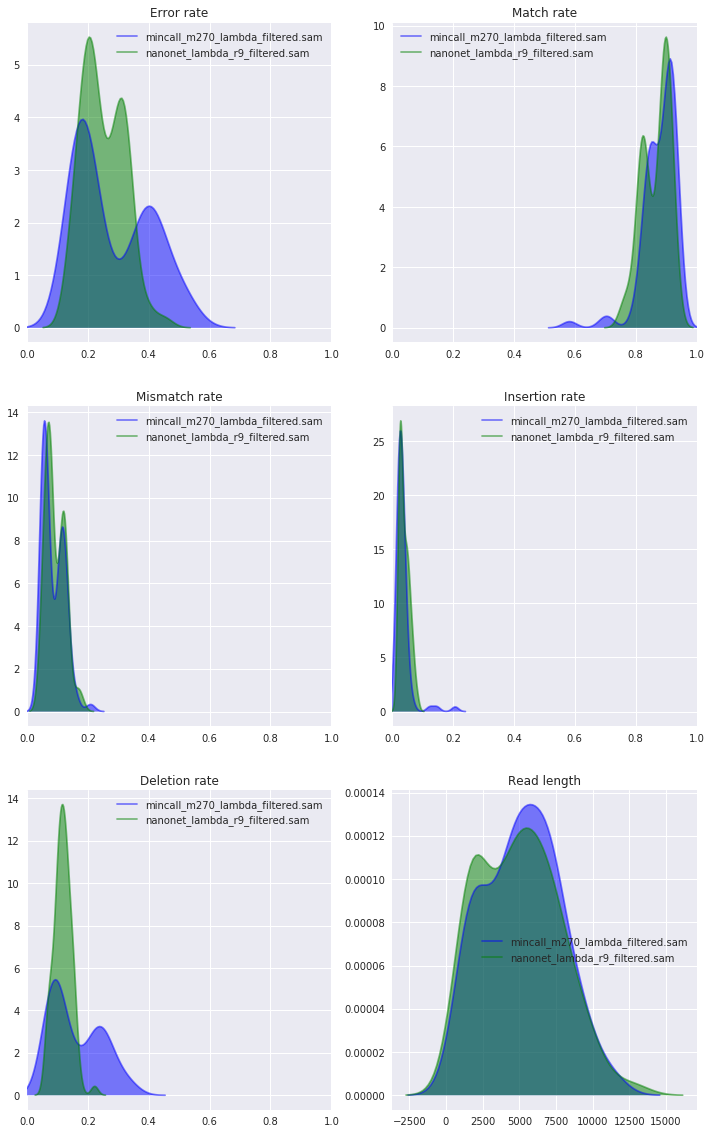

In [9]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(12, 20)
type(next(iter(df.values())))
for col, ax in zip(next(iter(df.values()))._get_numeric_data(), axes.ravel()):
    for c, k in zip("bg", df.keys()):
        sns.kdeplot(df[k][col],shade=True, label=k, alpha=0.5, ax=ax, color=c)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2])
    ax.set_title(col)
    if not col=="Read length":
        ax.set_xlim([0.0, 1.0])


/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


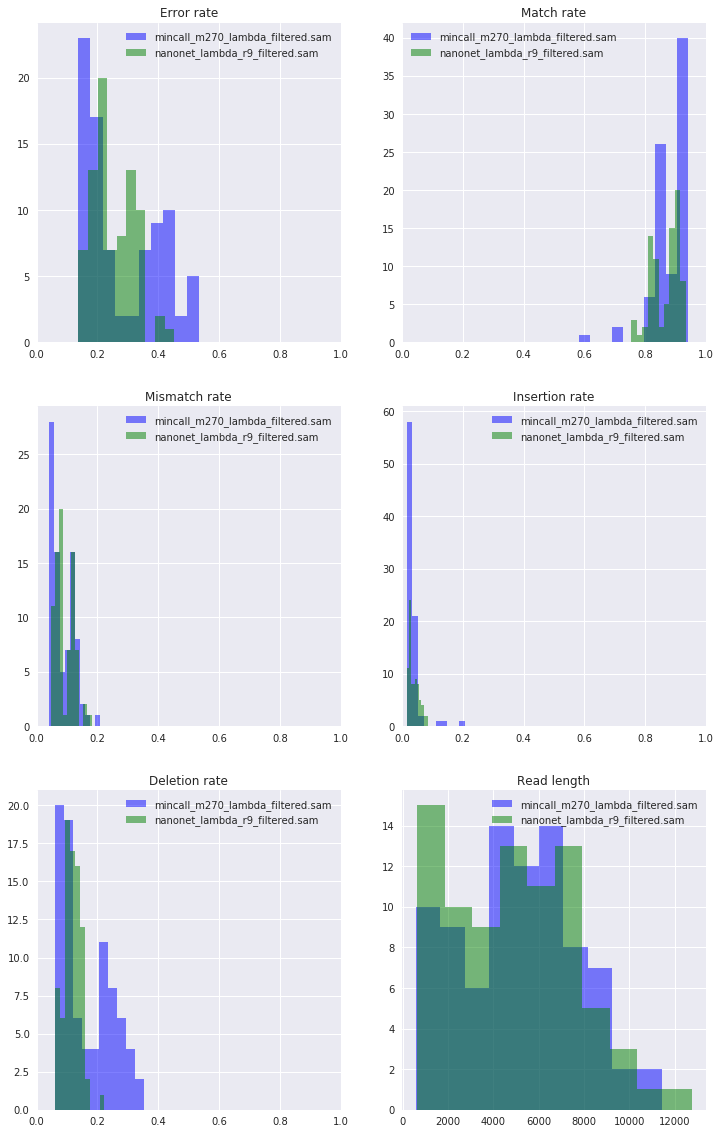

In [10]:
fig, axes = plt.subplots(3, 2)
fig.set_size_inches(12, 20)
type(next(iter(df.values())))
for col, ax in zip(next(iter(df.values()))._get_numeric_data(), axes.ravel()):
    for c, k in zip("bg", df.keys()):
        ax.hist(df[k][col], label=k, bins=10, alpha=0.5, color=c)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], labels[:2])
    ax.set_title(col)
    if not col=="Read length":
        ax.set_xlim([0.0, 1.0])

## CIGAR operations - position analysis

In [11]:
position_report={}
for sam in filtered_paths:
    position_report[sam.split(os.sep)[-1]] = \
        error_positions_report(sam, n_buckets=200)

ERROR:root:Andrej_HC_20160706_FNFAD12873_MN17271_sequencing_run_lambda_R9_6_7_16_21932_ch299_read862_strand1 No cigar string found


/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6087: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 0 x 1)
  '(shape is %d x %d)' % inp.shape[::-1])
/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6198: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
/usr/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


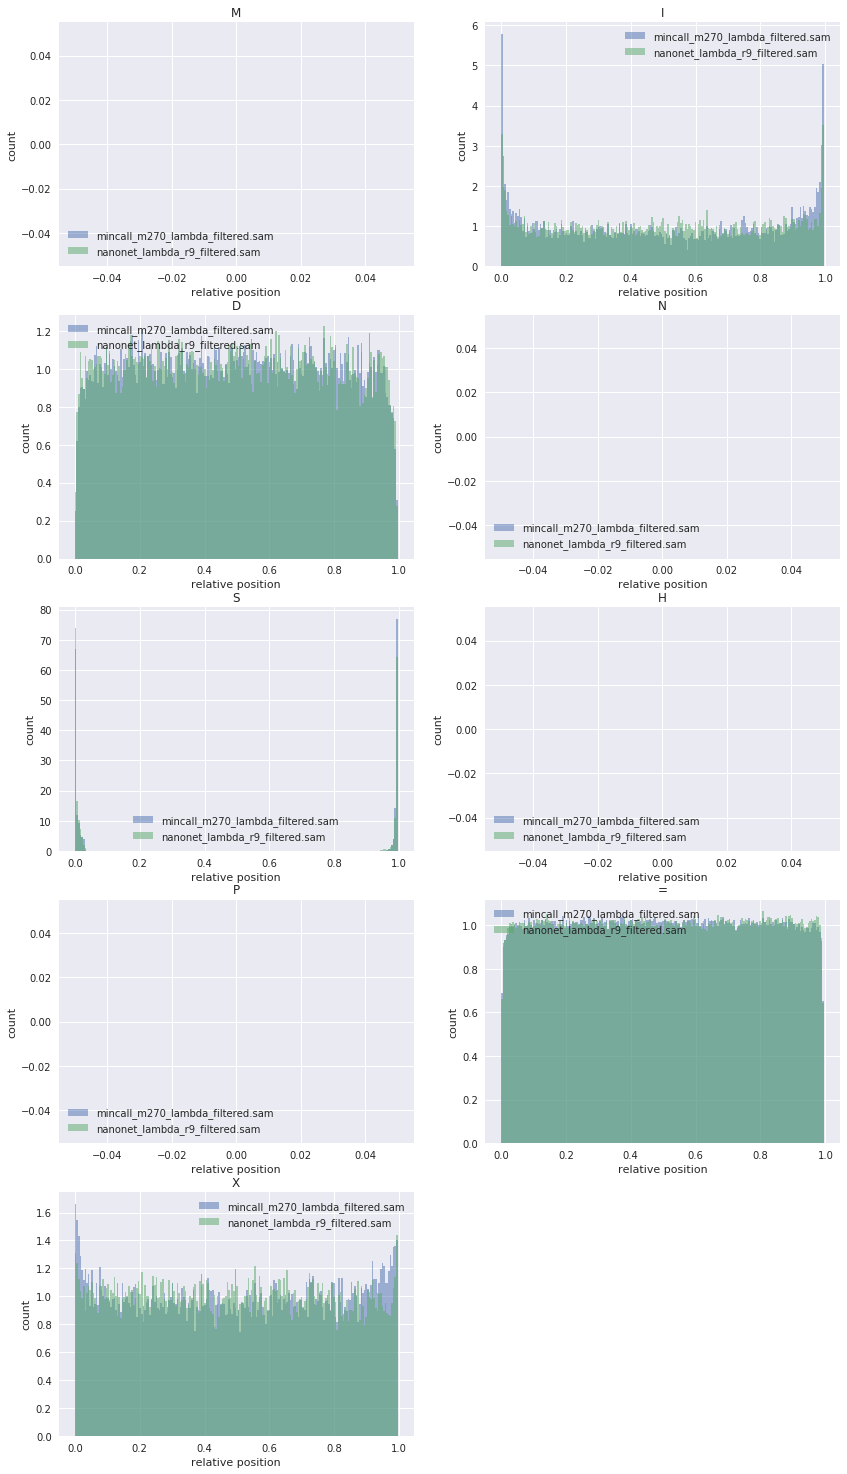

In [12]:
plt.figure(figsize=(14,26))

n_graphs = len(CIGAR_OPERATIONS)
n_cols = 2
n_rows = np.ceil(n_graphs/2)

for k, v in position_report.items():
    for i, op in enumerate(CIGAR_OPERATIONS):
        data = v[v.operation == op]

        plt.subplot(n_rows, n_cols, i+1)
        plt.hist(data.relative_position, weights=data.op_count, bins=200, label=k, alpha=0.5, normed=True)

        plt.xlabel('relative position')
        plt.ylabel('count')
        plt.title(op)
        plt.legend()

## Consensus stats

In [13]:
from mincall.consensus import get_consensus_report

In [14]:
report_out_dir = None #dir for vcf and csv files
tmp_files_dir = None #tmp dir for bam, bai and mpilup files
coverage_threshold = 0

# Arguments for storing detailed data
#report = get_consensus_report(sam_path, ref_path, coverage_threshold, report_out_dir, tmp_files_dir)
report = {}
for sam in sam_paths:
    report[sam.split(os.sep)[-1]] = get_consensus_report(sam, ref_path, coverage_threshold)

INFO:root:Converting sam to bam
INFO:root:Sorting bam file
INFO:root:Creating bam index
INFO:root:Creating mpileup
INFO:root:Generating consensus and report
100%|██████████| 48535/48535 [00:01<00:00, 44451.58it/s]
INFO:root:Cleaning tmp files
INFO:root:Converting sam to bam
INFO:root:Sorting bam file
INFO:root:Creating bam index
INFO:root:Creating mpileup
INFO:root:Generating consensus and report
100%|██████████| 48546/48546 [00:01<00:00, 47876.07it/s]
INFO:root:Cleaning tmp files


In [15]:
report.keys()
report['mincall_m270_lambda.sam']

,field,value
0,alignments_file,/home/lpp/mnt/ssh/karla/hgst8TB/mratkovic/nano...
1,mpileup_file,/tmp/tmpnx8cxxm6/mincall_m270_lambda.bam.bam.m...
2,coverage_threshold,0
3,snp_count,169
4,insertion_count,6
5,deletion_count,134
6,num_undercovered_bases,0
7,num_called_bases,48376
8,num_correct_bases,48190
9,average_coverage,10.0491


In [16]:
report['nanonet_lambda_r9.sam']

,field,value
0,alignments_file,/home/lpp/mnt/ssh/karla/hgst8TB/mratkovic/nano...
1,mpileup_file,/tmp/tmpm4w_y1mv/nanonet_lambda_r9.bam.bam.mpilup
2,coverage_threshold,0
3,snp_count,262
4,insertion_count,8
5,deletion_count,95
6,num_undercovered_bases,0
7,num_called_bases,48443
8,num_correct_bases,48168
9,average_coverage,8.92004
